### Using SciKit-Learn to predict housing prices in Boston



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

In [6]:
raw_boston = load_boston()


c:\Users\Aryan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [9]:
boston_df = pd.DataFrame(raw_boston.data, columns=raw_boston.feature_names)

boston_df['MEDV'] = raw_boston.target # MEDV is the median value of owner-occupied homes in $1000s, our target variable

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


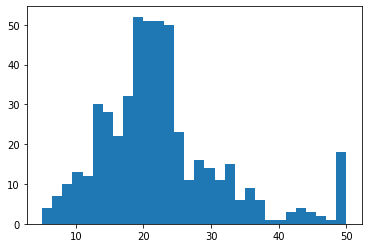

In [16]:
# Let's look at the distribution of the target variable

plt.hist(boston_df['MEDV'], bins=30)
plt.show()

#As we see, the target variable is mostly the iconic bell curve. Showing that Linear Regression is a good choice for this problem.
#NOTE: Few outliers but it won't effect the performance that much as we observe ONLY the features of highest correlation with the target variable.

In [11]:
# Let's look at the correlation between the features and the target variable

boston_df.corr()['MEDV'].sort_values()

# As we see, the features RM and LSTAT have the highest correlation coefficients with the target variable MEDV. Let's plot them in the next cell


LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

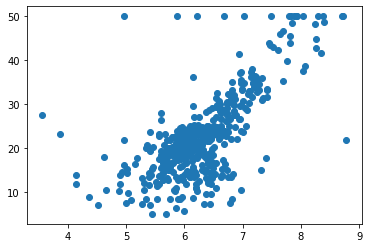

In [12]:
plt.scatter(boston_df['RM'], boston_df['MEDV'])

#Once again, the GENERAL shape for the data is linear. This is ANOTHER good sign for Linear Regression.

In [13]:
#Split the data into training and testing sets and use specifically the features RM and LSTAT

X = boston_df[['RM', 'LSTAT']]
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Use SkLearn's built in Linear Reg. Model to fit the data

model = LinearRegression()

model.fit(X_train, y_train)

# Let's look at the intercept and coefficients

intercept = model.intercept_
coef = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coef)

Intercept: -3.841177079004865
Coefficient: [ 5.46509877 -0.63249856]
